In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor()
)

train_dataloader = DataLoader(train_data, batch_size = 64)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor()
)

test_dataloader = DataLoader(test_data, batch_size = 64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()

        self.flatten = nn.Flatten()

        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        
        logits = self.linear_relu_stack(x)
        
        return logits

model = NeuralNetwork()

loss_function = nn.CrossEntropyLoss()

100%|██████████| 26.4M/26.4M [01:45<00:00, 252kB/s] 


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 306kB/s]


Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 4.42M/4.42M [00:02<00:00, 1.66MB/s]


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 322kB/s]


Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



In [3]:
def train_loop(dataloader, model, loss_function, optimizer):
    size = len(dataloader.dataset)
    
    model.train()

    sum_loss = 0
    
    for batch, (X, y) in enumerate(dataloader):
        pred = model(X)
        
        loss = loss_function(pred, y)
        
        sum_loss += loss.item()

        loss.backward()

        optimizer.step()
        
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [4]:
def test_loop(dataloader, model, loss_function):
    model.eval()
    
    size = len(dataloader.dataset)
    
    num_batches = len(dataloader)
    
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)

            test_loss += loss_function(pred, y).item()
            
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    
    correct /= size
    
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    
    return correct, test_loss

In [5]:
def run_training(epochs, train_dataloader, model, loss_function, optimizer):
    test_loss = []
    
    for t in range(epochs):
        print(f"Epoch {t+1}\n--------------------------------")
        
        sum_loss = train_loop(train_dataloader, model, loss_function, optimizer)

        acc, avg_loss = test_loop(test_dataloader, model, loss_function)

        test_loss.append(avg_loss)
    
    print("Done!")
    
    return test_loss

In [6]:
batch_size = 64
epochs = 5
learning_rate = 1e-3

optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [7]:
test_loss_sgd = run_training(epochs, train_dataloader, model, loss_function, optimizer)

Epoch 1
--------------------------------
loss: 2.297113  [   64/60000]
loss: 2.294049  [ 6464/60000]
loss: 2.275432  [12864/60000]
loss: 2.271397  [19264/60000]
loss: 2.248042  [25664/60000]
loss: 2.221400  [32064/60000]
loss: 2.226513  [38464/60000]
loss: 2.187085  [44864/60000]
loss: 2.190905  [51264/60000]
loss: 2.161870  [57664/60000]
Test Error: 
 Accuracy: 46.5%, Avg loss: 2.153699 

Epoch 2
--------------------------------
loss: 2.161372  [   64/60000]
loss: 2.152774  [ 6464/60000]
loss: 2.098278  [12864/60000]
loss: 2.113591  [19264/60000]
loss: 2.060719  [25664/60000]
loss: 2.002444  [32064/60000]
loss: 2.028447  [38464/60000]
loss: 1.943306  [44864/60000]
loss: 1.959885  [51264/60000]
loss: 1.885595  [57664/60000]
Test Error: 
 Accuracy: 57.9%, Avg loss: 1.882512 

Epoch 3
--------------------------------
loss: 1.918005  [   64/60000]
loss: 1.880653  [ 6464/60000]
loss: 1.773373  [12864/60000]
loss: 1.805277  [19264/60000]
loss: 1.707880  [25664/60000]
loss: 1.659327  [32064/

In [9]:
model = NeuralNetwork()

optimizer = torch.optim.RMSprop(model.parameters(), lr = learning_rate, alpha = 0.9)

test_loss_rms = run_training(epochs, train_dataloader, model, loss_function, optimizer)

Epoch 1
--------------------------------
loss: 2.313349  [   64/60000]
loss: 0.571502  [ 6464/60000]
loss: 0.457679  [12864/60000]
loss: 0.484935  [19264/60000]
loss: 0.477885  [25664/60000]
loss: 0.437119  [32064/60000]
loss: 0.382078  [38464/60000]
loss: 0.500665  [44864/60000]
loss: 0.576429  [51264/60000]
loss: 0.419380  [57664/60000]
Test Error: 
 Accuracy: 83.2%, Avg loss: 0.460704 

Epoch 2
--------------------------------
loss: 0.270802  [   64/60000]
loss: 0.323801  [ 6464/60000]
loss: 0.299807  [12864/60000]
loss: 0.370027  [19264/60000]
loss: 0.343430  [25664/60000]
loss: 0.398754  [32064/60000]
loss: 0.304579  [38464/60000]
loss: 0.407692  [44864/60000]
loss: 0.449471  [51264/60000]
loss: 0.401397  [57664/60000]
Test Error: 
 Accuracy: 84.7%, Avg loss: 0.432875 

Epoch 3
--------------------------------
loss: 0.236031  [   64/60000]
loss: 0.348255  [ 6464/60000]
loss: 0.210792  [12864/60000]
loss: 0.320757  [19264/60000]
loss: 0.360170  [25664/60000]
loss: 0.391925  [32064/

In [12]:
model = NeuralNetwork()

optimizer = torch.optim.Adadelta(model.parameters(), lr = learning_rate)

test_loss_adadelta = run_training(epochs, train_dataloader, model, loss_function, optimizer)

Epoch 1
--------------------------------
loss: 2.313066  [   64/60000]
loss: 2.303481  [ 6464/60000]
loss: 2.281042  [12864/60000]
loss: 2.271299  [19264/60000]
loss: 2.256661  [25664/60000]
loss: 2.231282  [32064/60000]
loss: 2.244324  [38464/60000]
loss: 2.215172  [44864/60000]
loss: 2.208457  [51264/60000]
loss: 2.184227  [57664/60000]
Test Error: 
 Accuracy: 34.6%, Avg loss: 2.186626 

Epoch 2
--------------------------------
loss: 2.196957  [   64/60000]
loss: 2.194615  [ 6464/60000]
loss: 2.145156  [12864/60000]
loss: 2.160505  [19264/60000]
loss: 2.129187  [25664/60000]
loss: 2.079383  [32064/60000]
loss: 2.110732  [38464/60000]
loss: 2.054974  [44864/60000]
loss: 2.056893  [51264/60000]
loss: 2.013658  [57664/60000]
Test Error: 
 Accuracy: 55.1%, Avg loss: 2.018483 

Epoch 3
--------------------------------
loss: 2.037925  [   64/60000]
loss: 2.030074  [ 6464/60000]
loss: 1.945473  [12864/60000]
loss: 1.980586  [19264/60000]
loss: 1.917020  [25664/60000]
loss: 1.861897  [32064/

In [15]:
model = NeuralNetwork()

optimizer = torch.optim.Adafactor(model.parameters(), lr = learning_rate)

test_loss_adafactor = run_training(epochs, train_dataloader, model, loss_function, optimizer)

Epoch 1
--------------------------------
loss: 2.315641  [   64/60000]
loss: 1.936046  [ 6464/60000]
loss: 1.362365  [12864/60000]
loss: 1.172098  [19264/60000]
loss: 0.853562  [25664/60000]
loss: 0.822797  [32064/60000]
loss: 0.813810  [38464/60000]
loss: 0.733915  [44864/60000]
loss: 0.703369  [51264/60000]
loss: 0.719325  [57664/60000]
Test Error: 
 Accuracy: 76.1%, Avg loss: 0.676094 

Epoch 2
--------------------------------
loss: 0.640268  [   64/60000]
loss: 0.721890  [ 6464/60000]
loss: 0.489237  [12864/60000]
loss: 0.718716  [19264/60000]
loss: 0.580103  [25664/60000]
loss: 0.565016  [32064/60000]
loss: 0.579309  [38464/60000]
loss: 0.648568  [44864/60000]
loss: 0.609435  [51264/60000]
loss: 0.582164  [57664/60000]
Test Error: 
 Accuracy: 80.3%, Avg loss: 0.559780 

Epoch 3
--------------------------------
loss: 0.495326  [   64/60000]
loss: 0.578470  [ 6464/60000]
loss: 0.395763  [12864/60000]
loss: 0.613835  [19264/60000]
loss: 0.509388  [25664/60000]
loss: 0.502854  [32064/

In [16]:
model = NeuralNetwork()

optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)

test_loss_adagrad = run_training(epochs, train_dataloader, model, loss_function, optimizer)

Epoch 1
--------------------------------
loss: 2.307850  [   64/60000]
loss: 0.833488  [ 6464/60000]
loss: 0.516167  [12864/60000]
loss: 0.714437  [19264/60000]
loss: 0.558100  [25664/60000]
loss: 0.556773  [32064/60000]
loss: 0.562297  [38464/60000]
loss: 0.643591  [44864/60000]
loss: 0.621197  [51264/60000]
loss: 0.523640  [57664/60000]
Test Error: 
 Accuracy: 81.0%, Avg loss: 0.530928 

Epoch 2
--------------------------------
loss: 0.442172  [   64/60000]
loss: 0.540108  [ 6464/60000]
loss: 0.367482  [12864/60000]
loss: 0.569548  [19264/60000]
loss: 0.478914  [25664/60000]
loss: 0.497632  [32064/60000]
loss: 0.475274  [38464/60000]
loss: 0.634913  [44864/60000]
loss: 0.591534  [51264/60000]
loss: 0.462884  [57664/60000]
Test Error: 
 Accuracy: 82.6%, Avg loss: 0.490089 

Epoch 3
--------------------------------
loss: 0.370630  [   64/60000]
loss: 0.493982  [ 6464/60000]
loss: 0.329901  [12864/60000]
loss: 0.524325  [19264/60000]
loss: 0.437636  [25664/60000]
loss: 0.467408  [32064/

In [17]:
model = NeuralNetwork()

optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

test_loss_adam = run_training(epochs, train_dataloader, model, loss_function, optimizer)

Epoch 1
--------------------------------
loss: 2.288651  [   64/60000]
loss: 0.542321  [ 6464/60000]
loss: 0.392037  [12864/60000]
loss: 0.498442  [19264/60000]
loss: 0.449679  [25664/60000]
loss: 0.455860  [32064/60000]
loss: 0.370529  [38464/60000]
loss: 0.524225  [44864/60000]
loss: 0.503836  [51264/60000]
loss: 0.477885  [57664/60000]
Test Error: 
 Accuracy: 84.5%, Avg loss: 0.425609 

Epoch 2
--------------------------------
loss: 0.272731  [   64/60000]
loss: 0.322239  [ 6464/60000]
loss: 0.285725  [12864/60000]
loss: 0.411112  [19264/60000]
loss: 0.392918  [25664/60000]
loss: 0.373438  [32064/60000]
loss: 0.314039  [38464/60000]
loss: 0.465180  [44864/60000]
loss: 0.416071  [51264/60000]
loss: 0.445110  [57664/60000]
Test Error: 
 Accuracy: 85.9%, Avg loss: 0.384510 

Epoch 3
--------------------------------
loss: 0.209780  [   64/60000]
loss: 0.293740  [ 6464/60000]
loss: 0.219545  [12864/60000]
loss: 0.347001  [19264/60000]
loss: 0.389869  [25664/60000]
loss: 0.358718  [32064/

In [18]:
model = NeuralNetwork()

optimizer = torch.optim.AdamW(model.parameters(), lr = learning_rate)

test_loss_adamW = run_training(epochs, train_dataloader, model, loss_function, optimizer)

Epoch 1
--------------------------------
loss: 2.309292  [   64/60000]
loss: 0.558286  [ 6464/60000]
loss: 0.387765  [12864/60000]
loss: 0.500569  [19264/60000]
loss: 0.465164  [25664/60000]
loss: 0.418086  [32064/60000]
loss: 0.373282  [38464/60000]
loss: 0.547553  [44864/60000]
loss: 0.494300  [51264/60000]
loss: 0.493759  [57664/60000]
Test Error: 
 Accuracy: 83.9%, Avg loss: 0.431399 

Epoch 2
--------------------------------
loss: 0.272905  [   64/60000]
loss: 0.353541  [ 6464/60000]
loss: 0.296928  [12864/60000]
loss: 0.399134  [19264/60000]
loss: 0.410164  [25664/60000]
loss: 0.382157  [32064/60000]
loss: 0.317200  [38464/60000]
loss: 0.481862  [44864/60000]
loss: 0.403914  [51264/60000]
loss: 0.484603  [57664/60000]
Test Error: 
 Accuracy: 85.5%, Avg loss: 0.389661 

Epoch 3
--------------------------------
loss: 0.218274  [   64/60000]
loss: 0.340930  [ 6464/60000]
loss: 0.222351  [12864/60000]
loss: 0.330059  [19264/60000]
loss: 0.414330  [25664/60000]
loss: 0.354325  [32064/

In [20]:
model = NeuralNetwork()

optimizer = torch.optim.Adamax(model.parameters(), lr = learning_rate)

test_loss_Adamax = run_training(epochs, train_dataloader, model, loss_function, optimizer)

Epoch 1
--------------------------------
loss: 2.315076  [   64/60000]
loss: 0.727454  [ 6464/60000]
loss: 0.423575  [12864/60000]
loss: 0.594305  [19264/60000]
loss: 0.511182  [25664/60000]
loss: 0.454503  [32064/60000]
loss: 0.441088  [38464/60000]
loss: 0.592503  [44864/60000]
loss: 0.530022  [51264/60000]
loss: 0.519525  [57664/60000]
Test Error: 
 Accuracy: 83.7%, Avg loss: 0.452877 

Epoch 2
--------------------------------
loss: 0.290429  [   64/60000]
loss: 0.402404  [ 6464/60000]
loss: 0.314815  [12864/60000]
loss: 0.467370  [19264/60000]
loss: 0.398967  [25664/60000]
loss: 0.374778  [32064/60000]
loss: 0.352252  [38464/60000]
loss: 0.503629  [44864/60000]
loss: 0.471670  [51264/60000]
loss: 0.479679  [57664/60000]
Test Error: 
 Accuracy: 85.6%, Avg loss: 0.405385 

Epoch 3
--------------------------------
loss: 0.244540  [   64/60000]
loss: 0.327660  [ 6464/60000]
loss: 0.252387  [12864/60000]
loss: 0.393213  [19264/60000]
loss: 0.343723  [25664/60000]
loss: 0.343679  [32064/

In [21]:
model = NeuralNetwork()

optimizer = torch.optim.ASGD(model.parameters(), lr = learning_rate)

test_loss_ASGD = run_training(epochs, train_dataloader, model, loss_function, optimizer)

Epoch 1
--------------------------------
loss: 2.311451  [   64/60000]
loss: 2.297670  [ 6464/60000]
loss: 2.284183  [12864/60000]
loss: 2.275147  [19264/60000]
loss: 2.240295  [25664/60000]
loss: 2.229644  [32064/60000]
loss: 2.231955  [38464/60000]
loss: 2.208857  [44864/60000]
loss: 2.200312  [51264/60000]
loss: 2.167875  [57664/60000]
Test Error: 
 Accuracy: 39.1%, Avg loss: 2.164638 

Epoch 2
--------------------------------
loss: 2.174553  [   64/60000]
loss: 2.164301  [ 6464/60000]
loss: 2.118287  [12864/60000]
loss: 2.134864  [19264/60000]
loss: 2.072600  [25664/60000]
loss: 2.030458  [32064/60000]
loss: 2.054190  [38464/60000]
loss: 1.988566  [44864/60000]
loss: 1.984449  [51264/60000]
loss: 1.916939  [57664/60000]
Test Error: 
 Accuracy: 54.7%, Avg loss: 1.917106 

Epoch 3
--------------------------------
loss: 1.942770  [   64/60000]
loss: 1.914561  [ 6464/60000]
loss: 1.812682  [12864/60000]
loss: 1.854256  [19264/60000]
loss: 1.742802  [25664/60000]
loss: 1.695825  [32064/

In [23]:
model = NeuralNetwork()

optimizer = torch.optim.NAdam(model.parameters(), lr = learning_rate)

test_loss_NAdam = run_training(epochs, train_dataloader, model, loss_function, optimizer)

Epoch 1
--------------------------------
loss: 2.309843  [   64/60000]
loss: 0.586896  [ 6464/60000]
loss: 0.446077  [12864/60000]
loss: 0.463326  [19264/60000]
loss: 0.440565  [25664/60000]
loss: 0.419592  [32064/60000]
loss: 0.402792  [38464/60000]
loss: 0.481282  [44864/60000]
loss: 0.490534  [51264/60000]
loss: 0.451216  [57664/60000]
Test Error: 
 Accuracy: 84.9%, Avg loss: 0.415442 

Epoch 2
--------------------------------
loss: 0.246183  [   64/60000]
loss: 0.349951  [ 6464/60000]
loss: 0.270673  [12864/60000]
loss: 0.330194  [19264/60000]
loss: 0.313247  [25664/60000]
loss: 0.369179  [32064/60000]
loss: 0.304868  [38464/60000]
loss: 0.419490  [44864/60000]
loss: 0.407628  [51264/60000]
loss: 0.399104  [57664/60000]
Test Error: 
 Accuracy: 86.3%, Avg loss: 0.366776 

Epoch 3
--------------------------------
loss: 0.205930  [   64/60000]
loss: 0.339311  [ 6464/60000]
loss: 0.207775  [12864/60000]
loss: 0.286541  [19264/60000]
loss: 0.320696  [25664/60000]
loss: 0.348780  [32064/

In [24]:
model = NeuralNetwork()

optimizer = torch.optim.RAdam(model.parameters(), lr = learning_rate)

test_loss_RAdam = run_training(epochs, train_dataloader, model, loss_function, optimizer)

Epoch 1
--------------------------------
loss: 2.310990  [   64/60000]
loss: 0.921779  [ 6464/60000]
loss: 0.480647  [12864/60000]
loss: 0.623237  [19264/60000]
loss: 0.499171  [25664/60000]
loss: 0.468747  [32064/60000]
loss: 0.426652  [38464/60000]
loss: 0.565002  [44864/60000]
loss: 0.526102  [51264/60000]
loss: 0.513970  [57664/60000]
Test Error: 
 Accuracy: 84.6%, Avg loss: 0.427859 

Epoch 2
--------------------------------
loss: 0.285235  [   64/60000]
loss: 0.360572  [ 6464/60000]
loss: 0.293517  [12864/60000]
loss: 0.423713  [19264/60000]
loss: 0.466921  [25664/60000]
loss: 0.369993  [32064/60000]
loss: 0.343666  [38464/60000]
loss: 0.490751  [44864/60000]
loss: 0.434518  [51264/60000]
loss: 0.494984  [57664/60000]
Test Error: 
 Accuracy: 85.2%, Avg loss: 0.402349 

Epoch 3
--------------------------------
loss: 0.239963  [   64/60000]
loss: 0.329262  [ 6464/60000]
loss: 0.250395  [12864/60000]
loss: 0.391823  [19264/60000]
loss: 0.439458  [25664/60000]
loss: 0.362633  [32064/

In [26]:
model = NeuralNetwork()

optimizer = torch.optim.Rprop(model.parameters(), lr = learning_rate)

test_loss_RProp = run_training(epochs, train_dataloader, model, loss_function, optimizer)

Epoch 1
--------------------------------
loss: 2.305434  [   64/60000]
loss: 0.749824  [ 6464/60000]
loss: 0.505324  [12864/60000]
loss: 18.968420  [19264/60000]
loss: 4.946246  [25664/60000]
loss: 6.608500  [32064/60000]
loss: 6.592973  [38464/60000]
loss: 9.619399  [44864/60000]
loss: 6.693482  [51264/60000]
loss: 5.607794  [57664/60000]
Test Error: 
 Accuracy: 76.5%, Avg loss: 11.370732 

Epoch 2
--------------------------------
loss: 1.861760  [   64/60000]
loss: 1.307964  [ 6464/60000]
loss: 0.444381  [12864/60000]
loss: 8.223912  [19264/60000]
loss: 3.367409  [25664/60000]
loss: 5.277805  [32064/60000]
loss: 4.808895  [38464/60000]
loss: 4.741365  [44864/60000]
loss: 4.076728  [51264/60000]
loss: 5.550427  [57664/60000]
Test Error: 
 Accuracy: 76.3%, Avg loss: 10.891176 

Epoch 3
--------------------------------
loss: 0.659514  [   64/60000]
loss: 1.130172  [ 6464/60000]
loss: 1.318263  [12864/60000]
loss: 1.274836  [19264/60000]
loss: 6.685601  [25664/60000]
loss: 8.303162  [320

## Графики зависимости сходимости

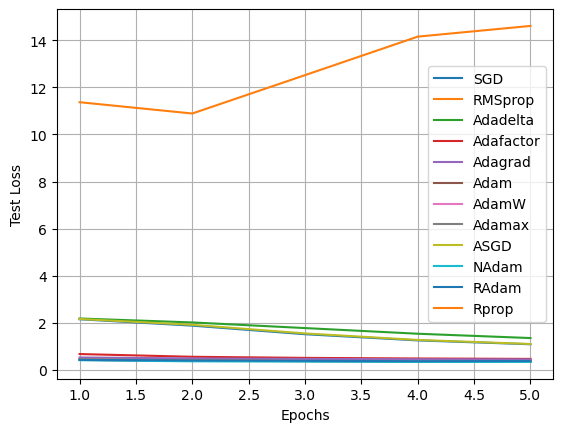

In [27]:
import matplotlib.pyplot as plt

plt.plot(range(1, epochs + 1), test_loss_sgd, label='SGD')
plt.plot(range(1, epochs + 1), test_loss_rms, label='RMSprop')
plt.plot(range(1, epochs + 1), test_loss_adadelta, label='Adadelta')
plt.plot(range(1, epochs + 1), test_loss_adafactor, label='Adafactor')
plt.plot(range(1, epochs + 1), test_loss_adagrad, label='Adagrad')
plt.plot(range(1, epochs + 1), test_loss_adam, label='Adam')
plt.plot(range(1, epochs + 1), test_loss_adamW, label='AdamW')
plt.plot(range(1, epochs + 1), test_loss_Adamax, label='Adamax')
plt.plot(range(1, epochs + 1), test_loss_ASGD, label='ASGD')
plt.plot(range(1, epochs + 1), test_loss_NAdam, label='NAdam')
plt.plot(range(1, epochs + 1), test_loss_RAdam, label='RAdam')
plt.plot(range(1, epochs + 1), test_loss_RProp, label='Rprop')

plt.xlabel('Epochs')
plt.ylabel('Test Loss')

plt.title('')

plt.grid(True)

plt.legend()

plt.show()

## Сравнение и выводы

In [ ]:
# TODO